<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Muhammad Fakhar ul Hasnain </h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/Muhammmadfakharulhasnain)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://https://www.kaggle.com/mfakharulhasnain)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammadfakharulhasnain6/)  

[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](muhammadfakharulhasnain6@gmail.com)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/profile.php?id=61557452995559)
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/muhammadfakharulhasnain6/)

# AIM: `We will classifiy the customers who will stay in our bank or leave the bank using deep learning approach.`

`Data Description:`

- Customer ID: A unique identifier for each customer

- Surname: The customer's surname or last name

- Credit Score: A numerical value representing the customer's credit score

- Geography: The country where the customer resides

- Gender: The customer's gender

- Age: The customer's age.

- Tenure: The number of years the customer has been with the bank

- Balance: The customer's account balance

- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

- HasCrCard: Whether the customer has a credit card

- IsActiveMember: Whether the customer is an active member

- EstimatedSalary: The estimated salary of the customer

- Exited: Whether the customer has churned (Target Variable)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# laod the datasets
df_train = pd.read_csv(r'D:\Course\Fakhar\train.csv')
df_test = pd.read_csv(r'D:\Course\Fakhar\test.csv')
#submission = pd.read_csv('data/sample_submission.csv')

In [3]:
# train dataset and exploration
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


In [4]:
df = df_train.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
# find and plot null values
df.isnull().sum().sort_values(ascending=False).head(5)

id             0
CustomerId     0
Surname        0
CreditScore    0
Geography      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [8]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# find the value counts of the categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



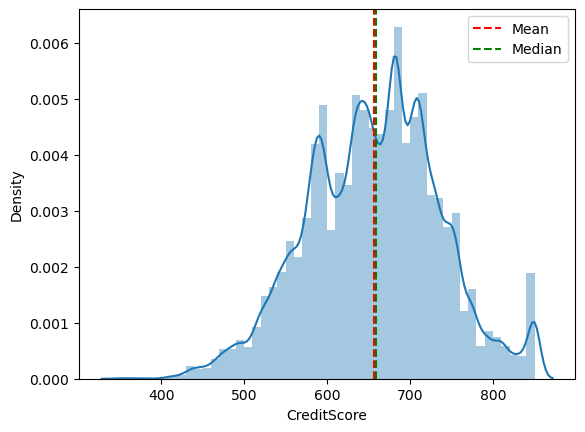

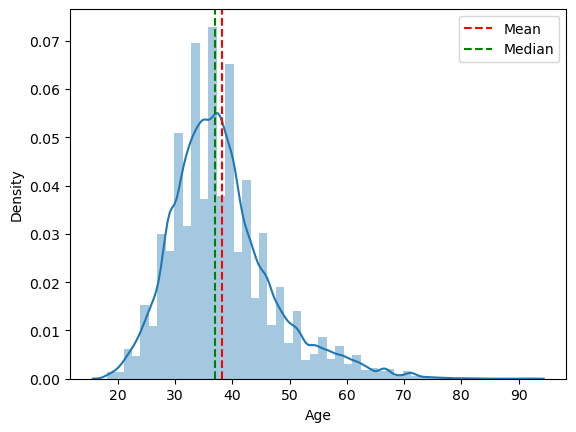

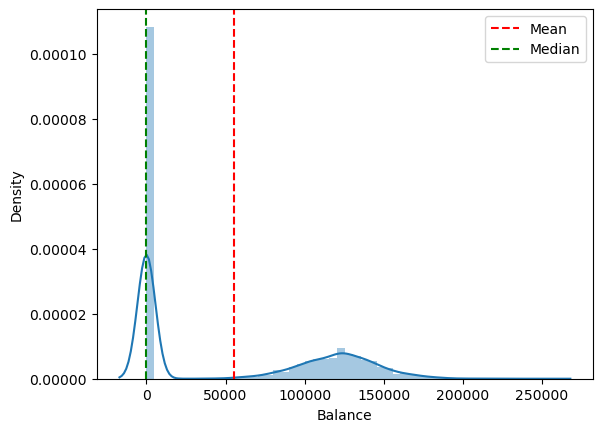

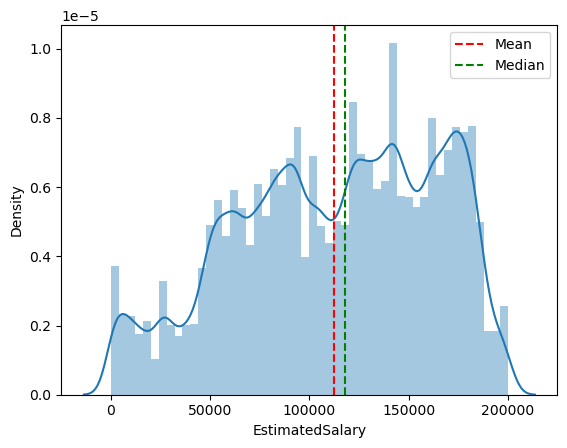

In [10]:
# create histogram of numerical columns using sns and kde=true
import matplotlib.pyplot as plt

for col in num_cols:
    sns.distplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

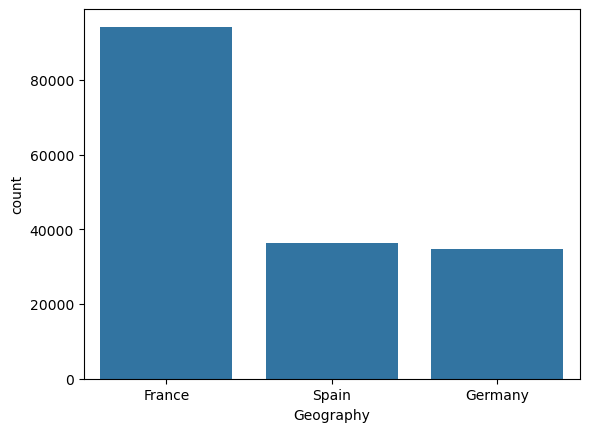

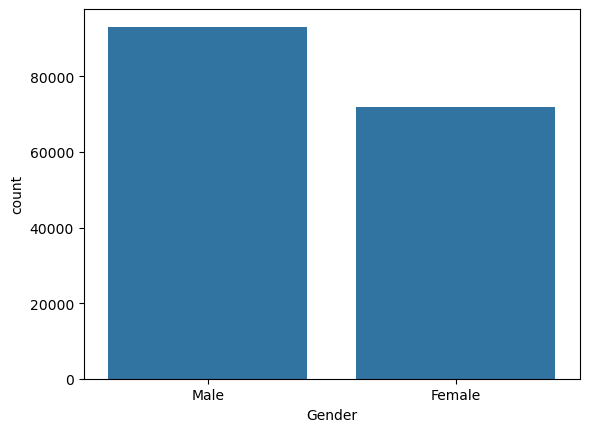

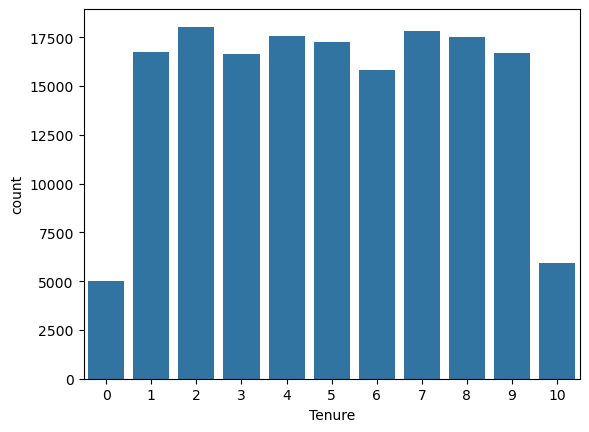

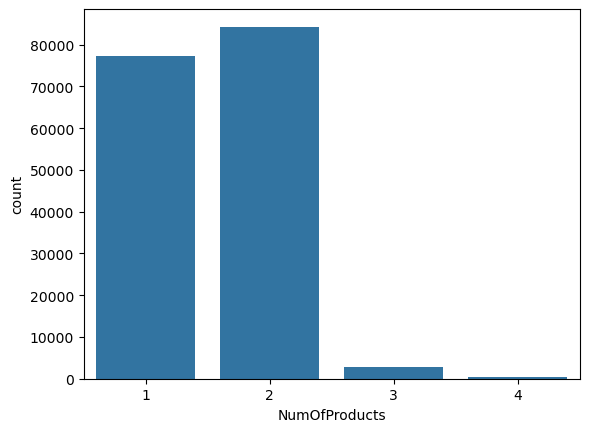

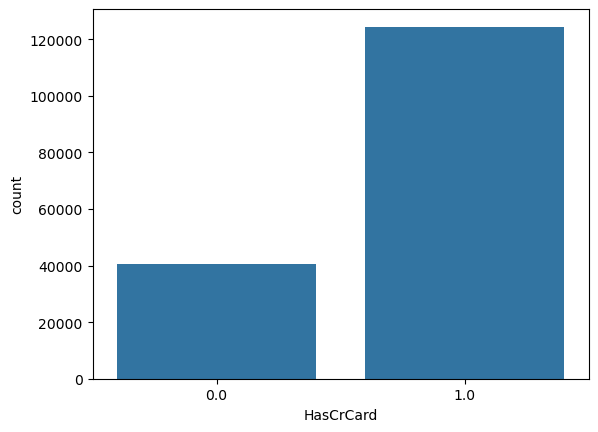

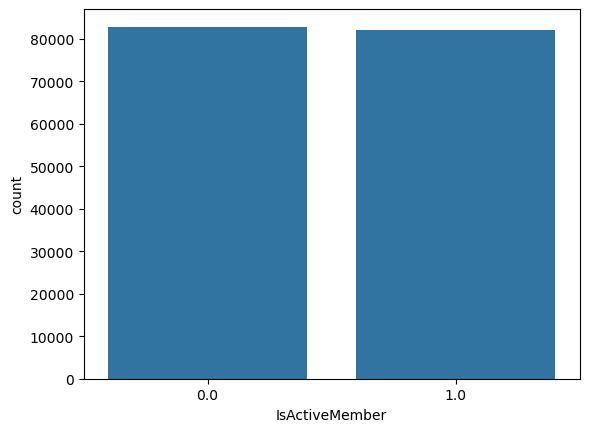

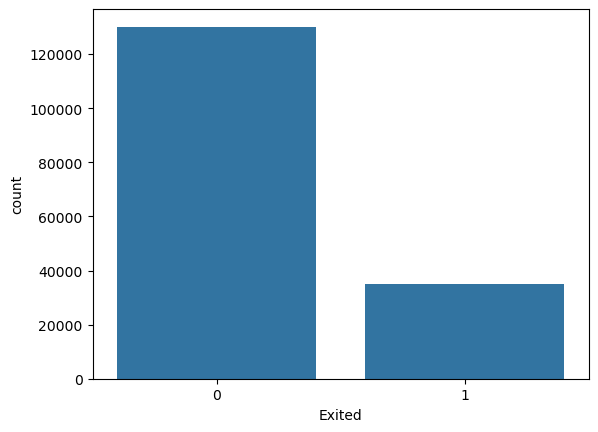

In [11]:
# create a count plot for each cat column
for col in cat_cols:
    sns.countplot(df , x = df[col])
    plt.show()

In [12]:
# print the number of rows and columns
print(f"The train dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The train dataset has 165034 rows and 14 columns


In [13]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Assuming df is your DataFrame
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])


In [16]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [17]:
# split the data into X and y
X = df.drop(['Exited', 'id', 'CustomerId', 'Surname'] , axis=1)
y = df['Exited']

In [18]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [19]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [20]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Neural Network Architecture

Epoch 1/100
4126/4126 [==============================] - 48s 11ms/step - loss: 15.1371 - accuracy: 0.6785 - val_loss: 8.2470 - val_accuracy: 0.6052
Epoch 2/100
4126/4126 [==============================] - 46s 11ms/step - loss: 1.7850 - accuracy: 0.7106 - val_loss: 0.6485 - val_accuracy: 0.7893
Epoch 3/100
4126/4126 [==============================] - 45s 11ms/step - loss: 0.6808 - accuracy: 0.7663 - val_loss: 0.5228 - val_accuracy: 0.7893
Epoch 4/100
4126/4126 [==============================] - 46s 11ms/step - loss: 0.5220 - accuracy: 0.7863 - val_loss: 0.5148 - val_accuracy: 0.7893
Epoch 5/100
4126/4126 [==============================] - 44s 11ms/step - loss: 0.5164 - accuracy: 0.7881 - val_loss: 0.5149 - val_accuracy: 0.7893
Epoch 6/100
4126/4126 [==============================] - 44s 11ms/step - loss: 0.5199 - accuracy: 0.7881 - val_loss: 0.5150 - val_accuracy: 0.7893
Epoch 7/100
4126/4126 [==============================] - 41s 10ms/step - loss: 0.5164 - accuracy: 0.7882 - val_loss: 

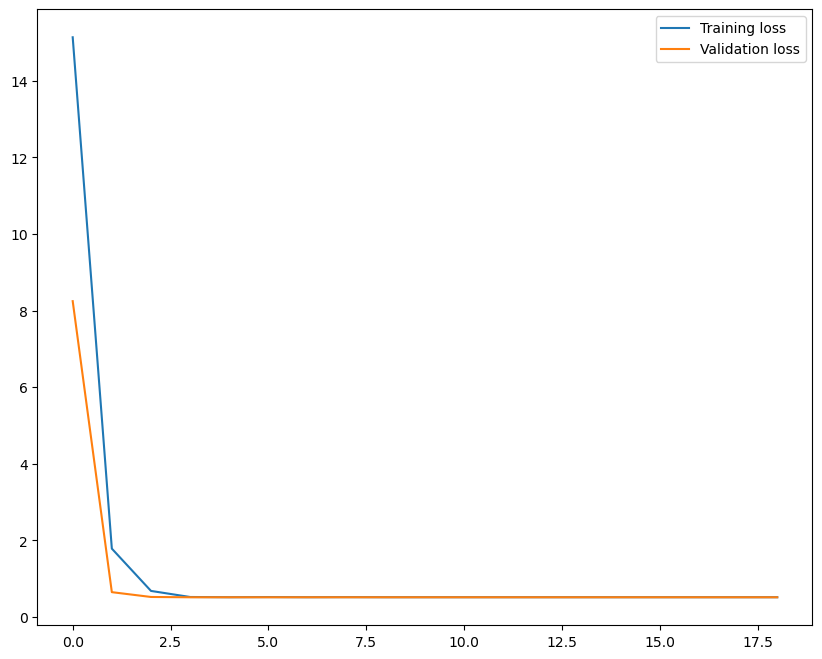

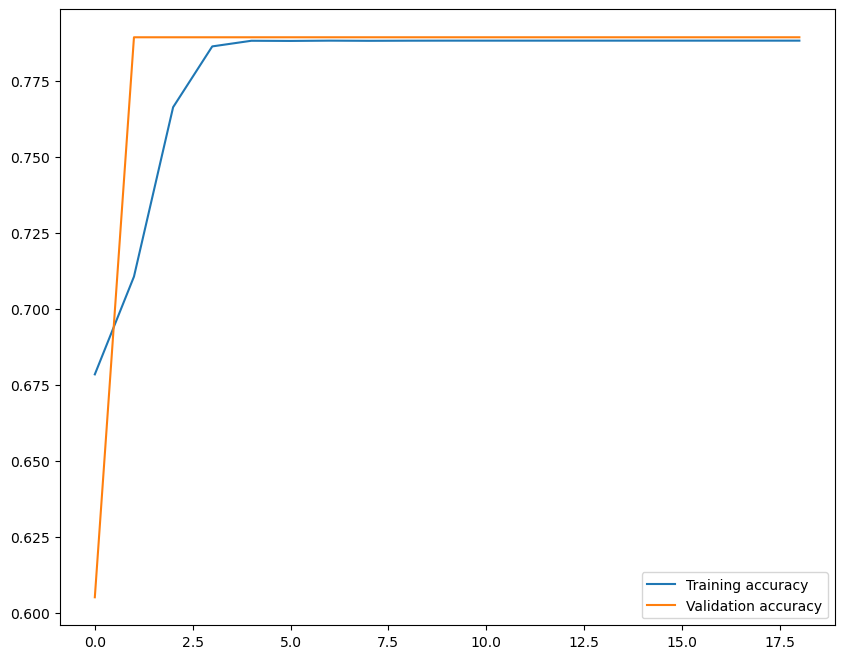

CPU times: total: 18min 11s
Wall time: 14min 14s


In [21]:
%%time
# create a deep neural network using tensorflow for binary classification
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3
    
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

# Define the callback function
early_stopping = EarlyStopping(patience=15)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# Save the trained model
model.save(r"D:\Course\Fakhar\binary_classification_model.h5")  # Saves the model in HDF5 format

# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()

# XGB classifier

Accuracy score:  0.8663313842518253
Precision score:  0.8663313842518253
Recall score:  0.8663313842518253
F1 score:  0.8663313842518253


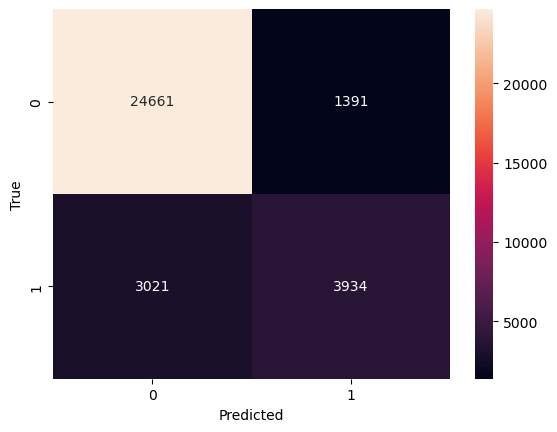

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical values
le = LabelEncoder()
df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# predict the test data and create a submission file of probability of each class
y_pred = xgb.predict_proba(df_test.drop(['id', 'CustomerId', 'Surname'], axis=1))

submission['Exited'] = y_pred[:, 1]
submission.to_csv('submission.csv', index=False)